In [2]:
import numpy as np
import matplotlib.pyplot as plt
from metaheuristicas import myDE


Ponto Otimo: [1.00004337 1.00003224 1.0000408 ]
Solucao Otima 3.550071921738056e-07


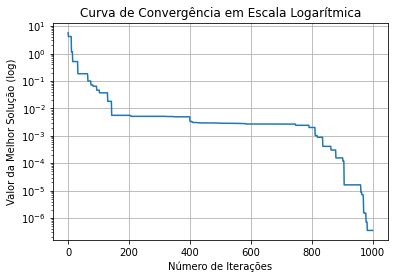

In [4]:
n = 10
F = 0.7
Cr = 0.9
N_max = 1000

lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])

def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

best,fmin,conv_curve = myDE(Fun,n,F,Cr,lb,ub,N_max)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.semilogy(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()

In [12]:
# rascunho do problema 8

d = 2.5
h = 2.5
t = 0.1
E = 3*10**7
L = 100
G = 1.154*10**7
P = -10000
siga = 40000
A = (d-t)*(h-t)
I = (1/12)*(d*h**3 - (d-2*t)*(h-2*t)**3)
J = (2 * t * (d-t)**2 * (h-t)**2)/(d+h-2*t)
k22 = 4*L**2 + ((G*J)/(E*I))*L**2
k33 = k22
Krig = np.array([[24,-6*L,6*L],
                 [-6*L,k22,0],
                 [6*L,0,k33]])
K = ((E*I)/L**3)*Krig
vecP = np.array([[P],[0],[0]])
U = np.linalg.inv(K)@vecP

 # deslocamentos
U1 = float(U[0])
U2 = float(U[1])
U3 = float(U[2])

# equacoes para as restricoes
T = -G*J/L * U3
tau = T/(2*A*t)
M1 = ((2*E*I)/L**2) * (-3*U1 + U2*L)
sig1 = (M1*h)/(2*I)
M2 = ((2*E*I)/L**2) * (-3*U1 + 2*U2*L)
sig2 = (M2*h)/(2*I)

# restricoes
g1 = ((sig1**2 + 3*tau**2)/(siga**2)) - 1
g2 = ((sig2**2 + 3*tau**2)/(siga**2)) - 1


if (g1 or g2) > 0:
    z = 2*L*(2*d*t + 2*h*t - 4*t**2) + (10**3)*(np.max([0,g1])+np.max([0,g2]))
else:
    z = 2*L*(2*d*t + 2*h*t - 4*t**2)
    

print(z)




222671.64184262633
